<h2> Workshop 6: Market Basket Analysis using Apriori Algorithm</h2>

Name: Jaime Pantoja

Student #: 2436040

Date: June 12, 2024

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Workshop-06-dataset.zip', sep='\t', dtype=str)

<h4 style="color:blue;">Q1: Print the first five rows of the dataset</h4>

In [3]:
df.head()

,transaction_ID,Date,Time,item_0,item_1,item_2,item_3,item_4,item_5,item_6,...,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40
0,536365,01/12/2010,08:26,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,536366,01/12/2010,08:28,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,536367,01/12/2010,08:34,ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,FELTCRAFT PRINCESS CHARLOTTE DOLL,IVORY KNITTED MUG COSY,BOX OF 6 ASSORTED COLOUR TEASPOONS,BOX OF VINTAGE JIGSAW BLOCKS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,536368,01/12/2010,08:34,JAM MAKING SET WITH JARS,RED COAT RACK PARIS FASHION,YELLOW COAT RACK PARIS FASHION,BLUE COAT RACK PARIS FASHION,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,536369,01/12/2010,08:35,BATH BUILDING BLOCK WORD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h4 style="color:blue;">Q2: How many rows and columns are there in the dataset?</h4>

In [4]:
num_rows, num_cols = df.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_cols}')

Number of rows: 31941
Number of columns: 44


## Generating your unique Dataset

In [5]:
STUDENT_NAME = 'JaimePantoja'
STUDENT_NO = '6040'

In [6]:
np.random.seed(int(STUDENT_NO))
unique_id = int('2'+STUDENT_NO)
rows = np.random.choice(df.index.values, unique_id)
data = df.loc[rows]

In [7]:
# Save the uniqeu dataset

file_name = STUDENT_NAME + "_" + STUDENT_NO + ".csv"
data.to_csv(file_name)

## Basic Data Analysis 

Let's get familiar with the dataset. Get some counts of the different columns

<h4 style="color:blue;">Q3: How many unique dates are there in the dataset? </h4>

In [8]:
unique_dates = df['Date'].nunique()

print(f'Number of unique dates: {unique_dates}')

Number of unique dates: 305


In [9]:
# Visualise the hours where the most and least transactions happened. Extract the hour from 'Time' column

data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

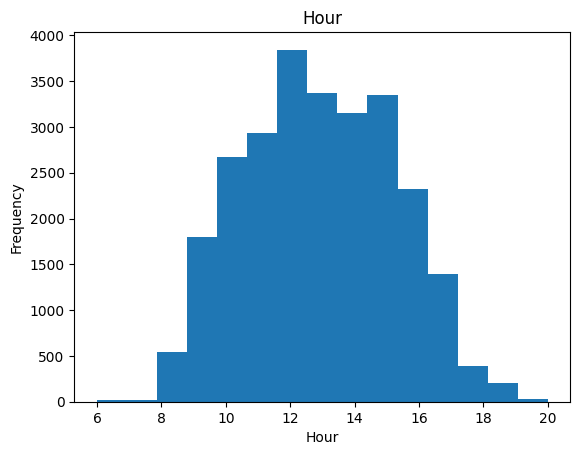

In [10]:
# Plot a histogram based on the hour

hour_hist = data.hist(column='Hour', bins=15, grid=False)

for ax in hour_hist.flatten():
    ax.set_xlabel('Hour')
    ax.set_ylabel('Frequency')

In [11]:
data.head()

,transaction_ID,Date,Time,item_0,item_1,item_2,item_3,item_4,item_5,item_6,...,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40,Hour
22900,569403,04/10/2011,09:02,EMBROIDERED RIBBON REEL SALLY,EMBROIDERED RIBBON REEL REBECCA,EMBROIDERED RIBBON REEL SOPHIE,PACK OF 72 RETROSPOT CAKE CASES,PARTY BUNTING,VICTORIAN GLASS HANGING T-LIGHT,NATURAL SLATE HEART CHALKBOARD,...,LUNCH BAG ALPHABET DESIGN,SET OF 10 LED DOLLY LIGHTS,PARISIENNE KEY CABINET,PARISIENNE CURIO CABINET,NaN,NaN,NaN,NaN,NaN,9
8434,548486,31/03/2011,12:51,LUNCH BAG RED RETROSPOT,PANTRY ROLLING PIN,RECIPE BOX PANTRY YELLOW DESIGN,SET OF 3 HEART COOKIE CUTTERS,SET OF 4 PANTRY JELLY MOULDS,HOMEMADE JAM SCENTED CANDLES,PANTRY PASTRY BRUSH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
2413,539720,21/12/2010,13:22,ASSORTED COLOUR BIRD ORNAMENT,WOODEN FRAME ANTIQUE WHITE,NATURAL SLATE HEART CHALKBOARD,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
7026,546465,14/03/2011,10:57,DECORATION WHITE CHICK MAGIC GARDEN,BUNNY WOODEN PAINTED WITH BIRD,PAINTED PINK RABBIT,BUNNY DECORATION MAGIC GARDEN,PARTY BUNTING,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,"KEY FOB , SHED",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
18246,562612,08/08/2011,12:00,BOHEMIAN COLLAGE STATIONERY SET,IVORY STRING CURTAIN WITH POLE,ENGLISH ROSE GARDEN SECATEURS,BLOSSOM IMAGES GIFT WRAP SET,VINTAGE 2 METER FOLDING RULER,FELTCRAFT HAIRBANDS PINK AND WHITE,3 TIER SWEETHEART GARDEN SHELF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


We can see that transactions happen between 06:00 and 20:00, and the shop gets busy around noon. We can assume that shop opens at 06:00 and closes at 20:00.

## Apriori Algorithm

Implementing the Apriori Algorithm requires 'apyori' package.

In [12]:
from apyori import apriori

As you are now familiar with the dataset, you should have noticed that not all columns are of interest to us. Most relevant for this analysis are the invoice number and description columns. The invoice number is essentially an ID for each "basket", and the description column contains the items. Therefore, using these two columns we can infer the items in each basket.

In order to use the information in these two columns, we have to prepare them for the algorithm. The package we are using requires the data to be in the form of nested lists, meaning that we need a list of baskets. The following steps carries this out.

We first extract the columns where the items are there.

In [13]:
items_df = data[data.columns[3:44]]

In [14]:
items_df.head()

,item_0,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,...,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40
22900,EMBROIDERED RIBBON REEL SALLY,EMBROIDERED RIBBON REEL REBECCA,EMBROIDERED RIBBON REEL SOPHIE,PACK OF 72 RETROSPOT CAKE CASES,PARTY BUNTING,VICTORIAN GLASS HANGING T-LIGHT,NATURAL SLATE HEART CHALKBOARD,ANTIQUE SILVER T-LIGHT GLASS,AIRLINE BAG VINTAGE JET SET RED,DOORMAT NEW ENGLAND,...,LUNCH BAG VINTAGE LEAF DESIGN,LUNCH BAG ALPHABET DESIGN,SET OF 10 LED DOLLY LIGHTS,PARISIENNE KEY CABINET,PARISIENNE CURIO CABINET,NaN,NaN,NaN,NaN,NaN
8434,LUNCH BAG RED RETROSPOT,PANTRY ROLLING PIN,RECIPE BOX PANTRY YELLOW DESIGN,SET OF 3 HEART COOKIE CUTTERS,SET OF 4 PANTRY JELLY MOULDS,HOMEMADE JAM SCENTED CANDLES,PANTRY PASTRY BRUSH,JAM MAKING SET WITH JARS,PANTRY WASHING UP BRUSH,CHARLOTTE BAG PINK POLKADOT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2413,ASSORTED COLOUR BIRD ORNAMENT,WOODEN FRAME ANTIQUE WHITE,NATURAL SLATE HEART CHALKBOARD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7026,DECORATION WHITE CHICK MAGIC GARDEN,BUNNY WOODEN PAINTED WITH BIRD,PAINTED PINK RABBIT,BUNNY DECORATION MAGIC GARDEN,PARTY BUNTING,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,SET 20 NAPKINS FAIRY CAKES DESIGN,TUB 24 PINK FLOWER PEGS,COSMETIC BAG VINTAGE ROSE PAISLEY,...,"KEY FOB , GARAGE DESIGN","KEY FOB , SHED",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18246,BOHEMIAN COLLAGE STATIONERY SET,IVORY STRING CURTAIN WITH POLE,ENGLISH ROSE GARDEN SECATEURS,BLOSSOM IMAGES GIFT WRAP SET,VINTAGE 2 METER FOLDING RULER,FELTCRAFT HAIRBANDS PINK AND WHITE,3 TIER SWEETHEART GARDEN SHELF,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE BATHROOM,SET OF 6 3D KIT CARDS FOR KIDS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
baskets = items_df.T.apply(lambda x: x.dropna().tolist()).tolist()

In [16]:
for i in baskets [:5]:
    print(i)

['EMBROIDERED RIBBON REEL SALLY', 'EMBROIDERED RIBBON REEL REBECCA', 'EMBROIDERED RIBBON REEL SOPHIE', 'PACK OF 72 RETROSPOT CAKE CASES', 'PARTY BUNTING', 'VICTORIAN GLASS HANGING T-LIGHT', 'NATURAL SLATE HEART CHALKBOARD', 'ANTIQUE SILVER T-LIGHT GLASS', 'AIRLINE BAG VINTAGE JET SET RED', 'DOORMAT NEW ENGLAND', 'DOORMAT WELCOME SUNRISE', 'DOORMAT WELCOME TO OUR HOME', 'ALARM CLOCK BAKELIKE GREEN', 'HAND WARMER BIRD DESIGN', 'SET OF 4 KNICK KNACK TINS DOILY', 'ASSORTED COLOUR BIRD ORNAMENT', 'SET OF 4 PANTRY JELLY MOULDS', 'ROUND SNACK BOXES SET OF4 WOODLAND', 'SPOTTY BUNTING', 'PAPER BUNTING VINTAGE PAISLEY', 'PAPER BUNTING RETROSPOT', 'JAM MAKING SET WITH JARS', 'CHILDRENS CUTLERY DOLLY GIRL', 'LUNCH BAG SPACEBOY DESIGN', 'SPACEBOY LUNCH BOX', 'CHILDRENS CUTLERY SPACEBOY', 'SPACEBOY BEAKER', 'SET OF 60 VINTAGE LEAF CAKE CASES', 'WRAP POPPIES  DESIGN', 'WRAP VINTAGE LEAF DESIGN', 'LUNCH BAG VINTAGE DOILY', 'LUNCH BAG VINTAGE LEAF DESIGN', 'LUNCH BAG ALPHABET DESIGN', 'SET OF 10 LED DO

## Algorithm Parameters


Now that the data has been put into an acceptable format, we are ready to run the algorithm. In order to do so, we run the 'apriori()' command. However, this command takes 5 parameters that we need to supply. The parameters are described below.

**Remember, the calculations are only given as information, you will not have to calculate any parameters for this task!**

**Dataset**

This is the dataset we just compiled in the previous cell. It has to be a list of lists, so in our case a list of lists containing shopping items.

**(Minimum) Support**

The support value refers to the popularity of an item, i.e., how often an item was bought. With this value, we specify the minimum 'popularity' of items that should be included. It is usually calculated like this:

Support(Item A) = (Baskets containing Item A)/(Total No. of Baskets)
Due to the limitations of the dataset we are working with, we will be starting with 0.01, and working with values between 0.02 and 0.001.

**(Minimum) Confidence**

The confidence value denotes the likelihood of a rule, i.e., how likely it is that an Item B will follow an Item A. With the minimum confidence, we specify the minimum likelihood that the rules need to satisfy. It is usually calculated like below:
Confidence(Item A → Item B) = (Baskets containing both (Item A and Item B))/(Baskets containing Item A)
We will be starting with a minimum confidence of 20% (0.2), meaning that for each rule the minimum likelihood needs to be this value or higher.

**(Minimum) Lift**
Lift is a measure of the performance of a rule. The lift value is the ratio of the increase of an Item B being bought when Item A is bought. Put more simply, it is the confidence divided by the support. Essentially, if we have a lift of 1 there is no association between two items, a higher lift means an increasing association.
Lift (Item B → Item A) = (Confidence (Item A→ Item B))/(Support (Item A))
We will be starting with a minimum lift of 3.

**(Minimum) Length of Rules**
This specifies how many items should be in each rule at least. If we set it at 2, then the rules will look like this: ITEM A→ ITEM B. If it is set at 4, then we could have a rule like this: ITEM A, ITEM B, ITEM C→ ITEM D. We will be starting with a length of 2.
Now that we know the parameters we can run the command. In the cell below, we run the apriori command with the following parameters (which will serve as our baseline parameters):

* Minimum Support = 0.01
* Minimum Confidence = 0.2
* Minimum Lift = 3


In [17]:
association_rules = apriori(baskets, min_support=0.01, min_confidence=0.2,
                            min_lift=3, min_length=2)
association_results = list(association_rules)

In [18]:
# We can see how many association rules we were able to generate.

print('Rules generated: ', len(association_results))

Rules generated:  84


In [19]:
# Identify how the association rule looks like for the algorithm, by printing the first rule form the list

print(association_results[0])

RelationRecord(items=frozenset({'ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE PINK'}), support=0.01228878648233487, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ALARM CLOCK BAKELIKE GREEN'}), items_add=frozenset({'ALARM CLOCK BAKELIKE PINK'}), confidence=0.40302267002518893, lift=16.449389227987336), OrderedStatistic(items_base=frozenset({'ALARM CLOCK BAKELIKE PINK'}), items_add=frozenset({'ALARM CLOCK BAKELIKE GREEN'}), confidence=0.5015673981191223, lift=16.449389227987336)])


In [20]:
# Check a different rule

print(association_results[1])

RelationRecord(items=frozenset({'ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE RED'}), support=0.01943164362519201, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ALARM CLOCK BAKELIKE GREEN'}), items_add=frozenset({'ALARM CLOCK BAKELIKE RED'}), confidence=0.6372795969773299, lift=19.07443759228698), OrderedStatistic(items_base=frozenset({'ALARM CLOCK BAKELIKE RED'}), items_add=frozenset({'ALARM CLOCK BAKELIKE GREEN'}), confidence=0.5816091954022988, lift=19.07443759228698)])


## Analysing the Resutls

Analysing the results may include checking what kind of items are featured in some of the rules. Using the following method, the results can be displayed.

In [21]:
def display_rules(association_results):
    for item in association_results:
        pair = item[0]
        items = [x for x in pair]
        print("Rule: " + items[0] + " -> " + items[1])
        print("Support: " + str(item[1]))
        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("\n")

In [22]:
# Display the results for only 10 rules

display_rules(association_results[0:10])

Rule: ALARM CLOCK BAKELIKE GREEN -> ALARM CLOCK BAKELIKE PINK
Support: 0.01228878648233487
Confidence: 0.40302267002518893
Lift: 16.449389227987336


Rule: ALARM CLOCK BAKELIKE GREEN -> ALARM CLOCK BAKELIKE RED
Support: 0.01943164362519201
Confidence: 0.6372795969773299
Lift: 19.07443759228698


Rule: ALARM CLOCK BAKELIKE IVORY -> ALARM CLOCK BAKELIKE RED
Support: 0.011175115207373272
Confidence: 0.5963114754098361
Lift: 17.84821933295647


Rule: ALARM CLOCK BAKELIKE RED -> ALARM CLOCK BAKELIKE PINK
Support: 0.0141321044546851
Confidence: 0.5768025078369906
Lift: 17.264295751810614


Rule: CHARLOTTE BAG PINK POLKADOT -> CHARLOTTE BAG SUKI DESIGN
Support: 0.011789554531490016
Confidence: 0.518581081081081
Lift: 18.729336132248754


Rule: HOT WATER BOTTLE I AM SO POORLY -> CHOCOLATE HOT WATER BOTTLE
Support: 0.0108678955453149
Confidence: 0.401418439716312
Lift: 18.632684795388172


Rule: CHOCOLATE HOT WATER BOTTLE -> HOT WATER BOTTLE TEA AND SYMPATHY
Support: 0.010330261136712749
Confid

In [23]:
# Below, you will see a count of the 10 most frequent items in the dataset

from collections import Counter

counter = Counter(baskets[0])
for i in baskets[1:]:
    if i!= 'nan':
        counter.update(i)
del counter['nan']
counter.most_common(10)

[('WHITE HANGING HEART T-LIGHT HOLDER', 1937),
 ('REGENCY CAKESTAND 3 TIER', 1799),
 ('JUMBO BAG RED RETROSPOT', 1796),
 ('PARTY BUNTING', 1429),
 ('LUNCH BAG RED RETROSPOT', 1329),
 ('ASSORTED COLOUR BIRD ORNAMENT', 1198),
 ('SET OF 3 CAKE TINS PANTRY DESIGN', 1167),
 ('LUNCH BAG  BLACK SKULL', 1107),
 ('NATURAL SLATE HEART CHALKBOARD', 1090),
 ('HEART OF WICKER SMALL', 1053)]

<h4 style="color:blue;">Q4: How many of these items can you find in the rules you have just displayed? Are all the top 10 items included? Provide an explanation as to why these items may be missing/present in the rules.</h4>

Yes, it is normal for the most frequent items (top 10) to appear in the association rules generated by the Apriori algorithm. Here’s why:

Support Threshold:
The Apriori algorithm identifies frequent itemsets based on a minimum support threshold.
Frequent itemsets are those that occur frequently enough in the dataset (above the threshold).
Association Rules:
The algorithm then generates association rules from these frequent itemsets.
These rules express relationships between items (antecedents) and outcomes (consequents).
Common Items:
Since the most frequent items have high support, they are likely to participate in many frequent itemsets.
Consequently, they often appear in the generated association rules.
Interpretation:
When reviewing the rules, focus on those with interesting confidence and lift values.
Frequent items may appear in both antecedents and consequents, reflecting common patterns.


<h4 style="color:blue;">Q5. Run the apriori algorithm with the following three different settings:</h4>
* Setting 1: Min Support = 0.015, Min Confidence = 0.7, Min Lift = 3 
* Setting 2: Min Support = 0.009, Min Confidence = 0.5, Min Lift = 3 
* Setting 3: Min Support = 0.015, Min Confidence = 0.5, Min Lift = 9 

Calculate the number of rules you get for each setting and how the quality of the rules differ in each setting.



In [24]:
# Define a function to iterate 

def apriori_function(baskets, min_support, min_confidence, min_lift):

    association_rules = apriori(baskets, min_support=min_support, min_confidence=min_confidence,
                                min_lift=min_lift, min_length=2)
    association_results = list(association_rules)
    return association_results

results_1 = apriori_function(baskets, 0.015, 0.7, 3)
results_2 = apriori_function(baskets, 0.009, 0.5, 3)
results_3 = apriori_function(baskets, 0.015, 0.5, 9)

print()
print('Number of rules in Setting 1: ' + str(len(results_1)))
print('Number of rules in Setting 2: ' + str(len(results_2)))
print('Number of rules in Setting 3: ' + str(len(results_3)))

    


Number of rules in Setting 1: 3
Number of rules in Setting 2: 52
Number of rules in Setting 3: 11


## Ideas:

A lower minimum support threshold means that more items will be considered frequent because the threshold is set low, allowing items with lower frequencies to pass to the next iteration. This will result in the use of more computational resources and ultimately more rules, as seen in the results of setting 2. Additionally, the rules will capture weaker associations that might not be very significant, potentially lowering the overall quality of the rules.

When the minimum confidence threshold is increased, it determines which associations the algorithm considers relevant. In other words, this parameter measures the strength of the relationship between items. A higher value will filter out weaker associations, resulting in more reliable patterns. In the model created with Setting 1, the minimum confidence threshold indicates that in the association {A} -> {B}, item B is purchased in at least 70% of transactions where item A is purchased.

In Setting 1, which has the highest minimum confidence parameter, weaker associations are filtered out. Consequently, this setting retrieves the fewest rules among the three models. The resulting rules represent the most significant associations.

A higher min_lift value selects rules that show the strongest and most actionable relationships. Consequently, the resulting rules tend to be more significant than those from models with a min_lift of 3. With all other parameters being equal, the model with the highest min_lift should provide fewer rules because it filters out weaker associations. However, the variation in min_confidence affects the number of rules, placing this model as the second-highest in rule count among the three models.





<h4 style="color:blue;">Q6. Filter the transactions from the day of the week or the month and generate association rules again. Discuss whether the rules change in different days or different months.</h4>

Filtering the dataset by week, month, or day generates subsets of data that can reveal valuable insights. These insights can help identify seasonal or weekly trends, which are crucial for planning inventory management, pricing strategies, and marketing campaigns.

In this workshop, data subsets will be grouped by day of the week to uncover patterns within the association rules. To gain an initial understanding of the transaction pattern, a bar chart will be plotted to visualize the overall behavior.


In [25]:
# Data analysis based on 

data_2 = data.copy()
data_2.head()


,transaction_ID,Date,Time,item_0,item_1,item_2,item_3,item_4,item_5,item_6,...,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40,Hour
22900,569403,04/10/2011,09:02,EMBROIDERED RIBBON REEL SALLY,EMBROIDERED RIBBON REEL REBECCA,EMBROIDERED RIBBON REEL SOPHIE,PACK OF 72 RETROSPOT CAKE CASES,PARTY BUNTING,VICTORIAN GLASS HANGING T-LIGHT,NATURAL SLATE HEART CHALKBOARD,...,LUNCH BAG ALPHABET DESIGN,SET OF 10 LED DOLLY LIGHTS,PARISIENNE KEY CABINET,PARISIENNE CURIO CABINET,NaN,NaN,NaN,NaN,NaN,9
8434,548486,31/03/2011,12:51,LUNCH BAG RED RETROSPOT,PANTRY ROLLING PIN,RECIPE BOX PANTRY YELLOW DESIGN,SET OF 3 HEART COOKIE CUTTERS,SET OF 4 PANTRY JELLY MOULDS,HOMEMADE JAM SCENTED CANDLES,PANTRY PASTRY BRUSH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
2413,539720,21/12/2010,13:22,ASSORTED COLOUR BIRD ORNAMENT,WOODEN FRAME ANTIQUE WHITE,NATURAL SLATE HEART CHALKBOARD,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
7026,546465,14/03/2011,10:57,DECORATION WHITE CHICK MAGIC GARDEN,BUNNY WOODEN PAINTED WITH BIRD,PAINTED PINK RABBIT,BUNNY DECORATION MAGIC GARDEN,PARTY BUNTING,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,"KEY FOB , SHED",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
18246,562612,08/08/2011,12:00,BOHEMIAN COLLAGE STATIONERY SET,IVORY STRING CURTAIN WITH POLE,ENGLISH ROSE GARDEN SECATEURS,BLOSSOM IMAGES GIFT WRAP SET,VINTAGE 2 METER FOLDING RULER,FELTCRAFT HAIRBANDS PINK AND WHITE,3 TIER SWEETHEART GARDEN SHELF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


In [26]:
# Check null values in 'Date' column

print('Number of null values in Date: '+ str(data_2['Date'].isnull().sum()))

Number of null values in Date: 0


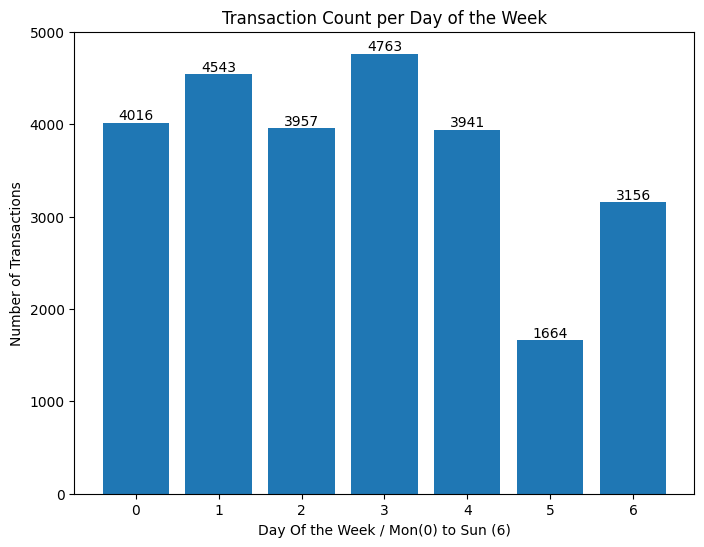

In [27]:
data_2['Date'] = pd.to_datetime(data_2['Date'])
data_2['DayOfWeek'] = data_2['Date'].dt.dayofweek
day_counts = data_2.groupby('DayOfWeek').size()

plt.figure(figsize=(8, 6))
plt.bar(day_counts.index, day_counts.values)
plt.xlabel('Day Of the Week / Mon(0) to Sun (6)')
plt.ylabel('Number of Transactions')
plt.title('Transaction Count per Day of the Week')

# Add text annotations for each bar
for x, y in zip(day_counts.index, day_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom')
plt.show()

Based on the results showing the number of transactions grouped by the day of the week, Thursday (day 3) has the highest transaction count. In contrast, there is a significant drop in transactions over the weekend, with both Saturday and Sunday experiencing substantial declines. Specifically, transactions on Saturday decrease by 68% compared to Thursday. Therefore, the analysis will focus on comparing purchase behavior between these two days.

This information enables a targeted analysis to identify the products sold on these specific days. By examining association patterns, stakeholders can adjust business strategies to boost weekend transactions.

In [28]:
# Filter dataset into three transaction groups, for Thurday, saturday and sunday.

def get_data (dataset, num_day):
    '''
    The function reurns a dataset filtered by the day of the week.
    
    '''
    new_data = dataset.loc[dataset['DayOfWeek'] == num_day]
    return new_data


transactions_thursday = get_data(data_2, 3)
transactions_saturday = get_data(data_2, 5)



In [29]:
# Create a basket, list of lists to input in the apriori Algorithm

def create_basket(data):
    ''' 
    The function retrieves a list of list based on the dataset passed as a parameter
    '''
    items_df = data[data.columns[3:44]]
    basket = items_df.T.apply(lambda x: x.dropna().tolist()).tolist()
    return basket

basket_thursday = create_basket(transactions_thursday)
basket_saturday = create_basket(transactions_saturday)


In [30]:
# Using the Apriori Function defined before the baskets of each day will be passed through. The settingg used are:
# min_support = 1.5% | min_confidence = 1.5% | min_lift = 3

rules_thursday = apriori_function(basket_thursday, 0.015, 0.7, 3)
rules_saturday = apriori_function(basket_saturday, 0.015, 0.7, 3)


# Print the number of rules for each configuration
print("The count of rules in Thursday's basket is:", len(rules_thursday))
print("The count of rules in Saturday's basket is:", len(rules_saturday))


The count of rules in Thursday's basket is: 6
The count of rules in Saturday's basket is: 9


In [31]:
# Function to print the association rules of each day

def print_rules (rules, day):
    print(f"Association rules for {day}:")
    print("____________________________")
    for i, rule in enumerate(rules):
        antecedents = set(rule.ordered_statistics[0].items_base)
        consequents = set(rule.ordered_statistics[0].items_add)
        print(f"Association rule {i+1}: {antecedents} | {consequents}")  

In [32]:
print_rules(rules_thursday, "Thursday")

Association rules for Thursday:
____________________________
Association rule 1: {'GARDENERS KNEELING PAD CUP OF TEA'} | {'GARDENERS KNEELING PAD KEEP CALM'}
Association rule 2: {'PINK REGENCY TEACUP AND SAUCER'} | {'GREEN REGENCY TEACUP AND SAUCER'}
Association rule 3: {'GREEN REGENCY TEACUP AND SAUCER'} | {'ROSES REGENCY TEACUP AND SAUCER'}
Association rule 4: {'PINK REGENCY TEACUP AND SAUCER'} | {'ROSES REGENCY TEACUP AND SAUCER'}
Association rule 5: {'GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'} | {'ROSES REGENCY TEACUP AND SAUCER'}
Association rule 6: {'GREEN REGENCY TEACUP AND SAUCER', 'REGENCY CAKESTAND 3 TIER'} | {'ROSES REGENCY TEACUP AND SAUCER'}


In [33]:
print_rules(rules_saturday, "Saturday")

Association rules for Saturday:
____________________________
Association rule 1: {'PINK REGENCY TEACUP AND SAUCER'} | {'GREEN REGENCY TEACUP AND SAUCER'}
Association rule 2: {'ROSES REGENCY TEACUP AND SAUCER'} | {'GREEN REGENCY TEACUP AND SAUCER'}
Association rule 3: {'HAND WARMER OWL DESIGN'} | {'HAND WARMER SCOTTY DOG DESIGN'}
Association rule 4: {'JUMBO BAG STRAWBERRY'} | {'JUMBO BAG RED RETROSPOT'}
Association rule 5: {'JUMBO STORAGE BAG SKULLS'} | {'JUMBO STORAGE BAG SUKI'}
Association rule 6: {'SMALL MARSHMALLOWS PINK BOWL'} | {'SMALL DOLLY MIX DESIGN ORANGE BOWL'}
Association rule 7: {'GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'} | {'ROSES REGENCY TEACUP AND SAUCER'}
Association rule 8: {'JUMBO SHOPPER VINTAGE RED PAISLEY', 'JUMBO BAG PINK POLKADOT'} | {'JUMBO BAG RED RETROSPOT'}
Association rule 9: {'JUMBO STORAGE BAG SUKI', 'JUMBO BAG PINK POLKADOT'} | {'JUMBO BAG RED RETROSPOT'}


## Analysis of Association Rules: Thursday vs. Saturday

The results show interesting transaction patterns across different days. For instance, on Thursdays, most association rules are in products related to tea sets and accessories (e.g., teacups, saucers, cakestands). However, on Saturdays, the rules are more diverse showing items like teacups and saucers but also hand warmers, jumbo bags, storage bags, and small bowls. The purchase behavior on Saturdays indicates fewer overlapping associations and a broader range of customer interests.

In general terms, it is possible to conclude that Thursdays have focused associations around tea sets. Whereas, the transaction's distribution on Saturdays is more diverse indicating a broader range of interest from the consumer perspective. These observations enable the creation of different strategies in terms of marketing and inventory management to increase business profitability.

<u>Guidelines for Marketing and Promotion Strategy.</u>

* Thursday: Leverage the interest in tea sets by introducing more items related to this category. Continue promoting the current products, and place the ones with strong associations nearby within the shelves and throughout the store's space.

* Saturdays: Consider the implementation of weekend promotions to increase the number of transactions, especially on Saturdays. Additionally, highlight items from popular categories such as tea sets to promote sales.

<u>Guidelines for Inventory Management Strategy:</u>

* Thursday: Ensure sufficient stock of tea-related products and consider cross-merchandising strategies to encourage customers to buy complementary items.

* Saturday: Maintain a broader inventory range and monitor which categories are gaining traction to adjust stock levels accordingly.

By considering these observations, the business can refine its strategy to promote customer engagement and increase sales, particularly, on Saturdays which presents the lowest transaction number.
